<a href="https://colab.research.google.com/github/Surajk86808/ML-code/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/height_weight_50_persons.csv")

In [ ]:
df.head()

,Height_cm,Weight_kg
0,175.0,69.9
1,168.6,59.2
2,176.5,54.8
3,185.2,74.2
4,167.7,80.5


Text(0, 0.5, 'Height')

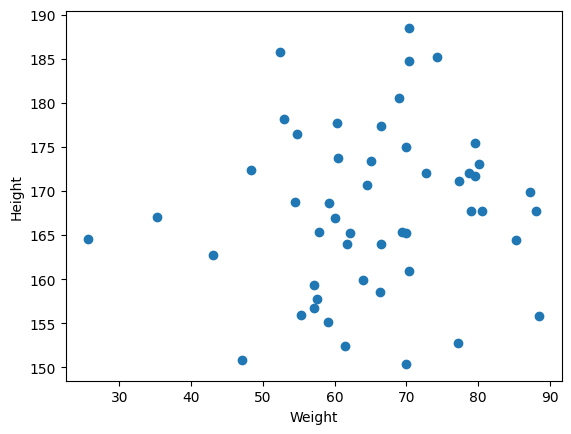

In [ ]:
plt.scatter(df['Weight_kg'],df['Height_cm'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
df.corr()


,Height_cm,Weight_kg
Height_cm,1.000000,0.110234
Weight_kg,0.110234,1.000000


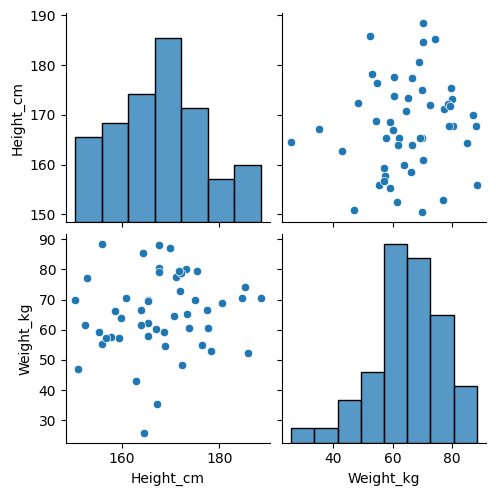

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df[['Weight_kg']] # This show it is 2d(also called data frame) and why dataframe because scikitlearn need input as 2d (dataframe ) in linear regression
y = df['Height_cm'] # here it is 1d (also called series) and ouput should be in series

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [ ]:
X_train.shape
# 2d dataframe

(37, 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
y_train.shape
# 1d series

(37,)

In [ ]:
from sklearn.preprocessing import StandardScaler
# why standarztion => To make data with in the range of 0 to 1 we use standardization
# now why in range of 0 to 1 => because the data can very large and on handling gradient descent graph for finding global minima

In [ ]:
# standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# remeber here there are alot question can be make
# like why X_test= sc.transform but for X_train = sc.fit_transform
# what is data leakage
# z_score what is this?
# why not standardization on y_test and y_train?

In [ ]:
# apply linear regression
from sklearn.linear_model import LinearRegression


In [ ]:
regression = LinearRegression(n_jobs=-1)
# what is n_jobs = -1 ;



In [ ]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
# regression.coef_ gives slope of the equation (see equatio from notes)
# regression.intercept_ gives intercept of the equation

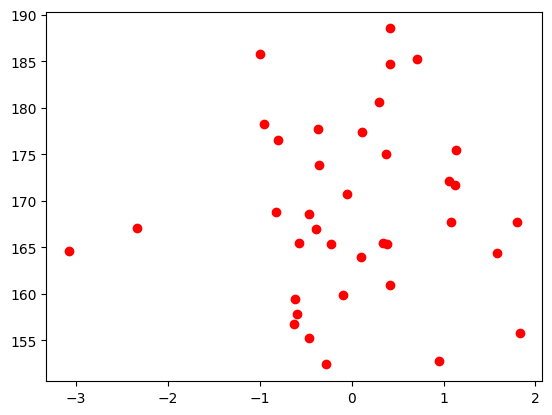

In [ ]:
# ploting trainig data plot best fit line
plt.scatter(X_train,y_train,color='red')


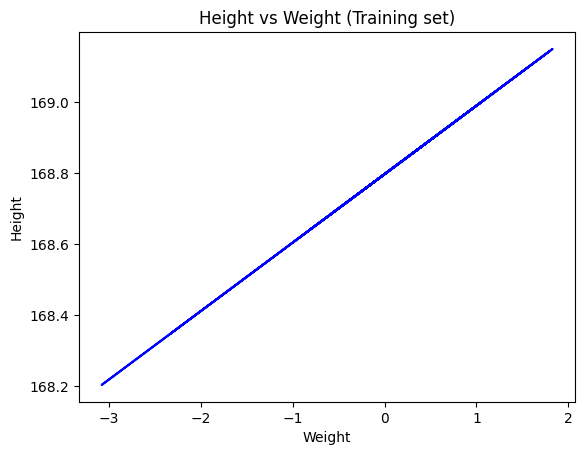

In [ ]:
plt.plot(X_train,regression.predict(X_train),color='blue')
plt.title('Height vs Weight (Training set)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

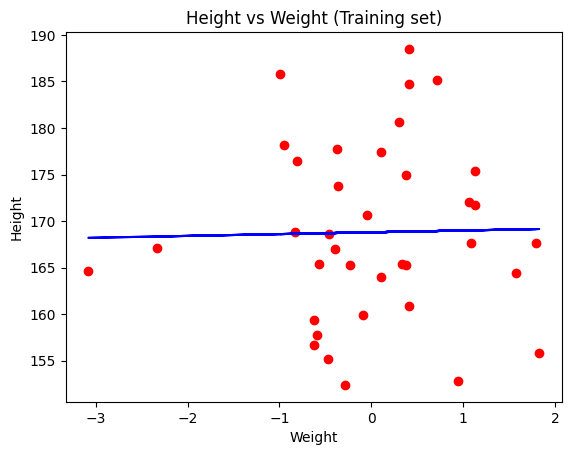

In [ ]:
# combinig above 2
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regression.predict(X_train),color='blue')
plt.title('Height vs Weight (Training set)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [ ]:
#  this graph not suited for linear regression but for practice using it

# predction of test data
predicted height output = intercept + coef_(weight)


In [ ]:
y_predict = regression.predict(X_test)


In [ ]:
# performance metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_predict)
print(mse)
print(mae)
print(rmse)
print (score)

80.33760826529365
6.877629375559125
8.963124916305343
-0.22773508781698215


now why negative r2 score =>
it is suprising =>R-squared tells you how much better our linear regression model is at guessing the height compared to just using that simple average guess.

If R-squared is 1, our model is perfect.
If R-squared is 0, our model is no better than the average guess.
If R-squared is negative (like yours), it means our model is actually worse at guessing height than just using the simple average height and also correlation was very poor.


In [ ]:
# now adjusted r2


In [ ]:
# Calculate adjusted R2
n = X_test.shape[0] # number of observations
k = X_test.shape[1] # number of features

adjusted_r2_score = 1 - ((1 - score) * (n - 1) / (n - k - 1))

print(f'Adjusted R2 Score: {adjusted_r2_score}')

Adjusted R2 Score: -0.33934736852761693


The main takeaway is that a simple linear relationship between weight and height doesn't seem to exist in this specific dataset, leading to a poor model fit and negative R-squared values.

In [ ]:
# Ols linear regression
import statsmodels.api as sm

# statsmodels and scikit-learn are different Python libraries, although they both deal with statistical modeling and machine learning.

In [ ]:
model = sm.OLS(y_train,X_train).fit()

In [ ]:
predict = model.predict(X_test)
print(predict)
# above is for ols

[-2.71712766e-01  1.14607156e-01 -5.13896856e-02 -3.33584316e-01
  2.26277759e-01 -8.15709296e-05  1.80271754e-02  1.84024017e-01
  3.33421175e-01 -1.47969666e-01 -2.52094958e-01  2.32314007e-01
  7.23534145e-02]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Height_cm   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.028
Method:                 Least Squares   F-statistic:                          4.692e-05
Date:                Thu, 17 Jul 2025   Prob (F-statistic):                       0.995
Time:                        18:13:03   Log-Likelihood:                         -242.32
No. Observations:                  37   AIC:                                      486.6
Df Residuals:                      36   BIC:                                      488.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# prediction for new data
regression.predict([[72]])
# Why the height is coming 182 which may be right but by seeing the model it must give wrong so for correct => Remember we converted it in standardization for calculation now during predictiion we should convert it in normal by applying scaler.transform

array([182.6934065])

In [ ]:
regression.predict(sc.transform([[72]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([168.90134102])